In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
plt.rcParams['figure.figsize'] = (12, 6)

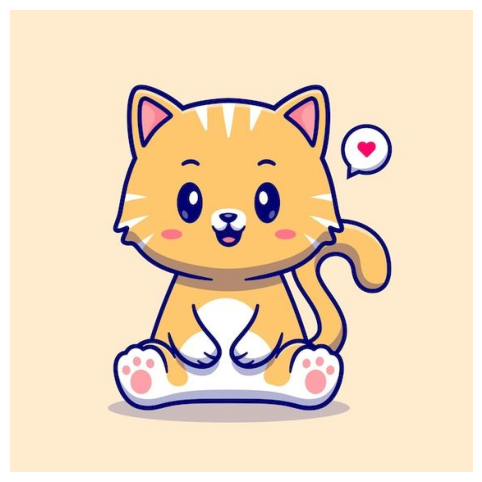

In [27]:
# load the image
imge = cv2.imread('/content/cat4.jpg')
imge = cv2.cvtColor(imge, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(imge)

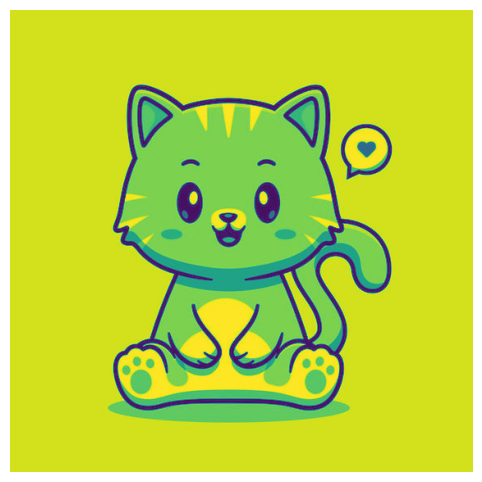

In [28]:
img = cv2.imread("cat4.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.axis("off")
plt.imshow(gray_img)

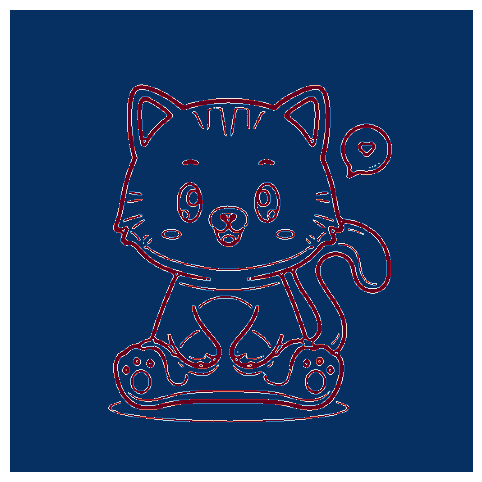

In [29]:
# edge mask generation
lines_size = 7
blur_values = 7

gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_blur = cv2.medianBlur(gray_image, blur_values)
edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, lines_size, blur_values)


plt.axis("off")
plt.imshow(edges, cmap='RdBu')

In [31]:
# Color quantization with KMeans clustering
from sklearn.cluster import KMeans

k = 7
datas = img.reshape(-1, 3)

kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
imag_reduced = kmeans.cluster_centers_[kmeans.labels_]
imag_reduced = img_reduced.reshape(img.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


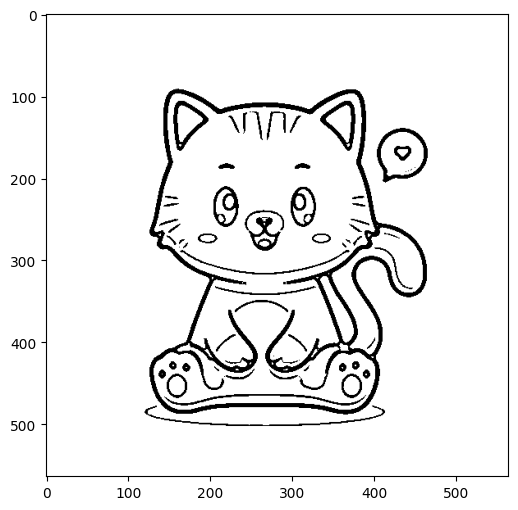

In [32]:
plt.imshow(edges, cmap='gray')

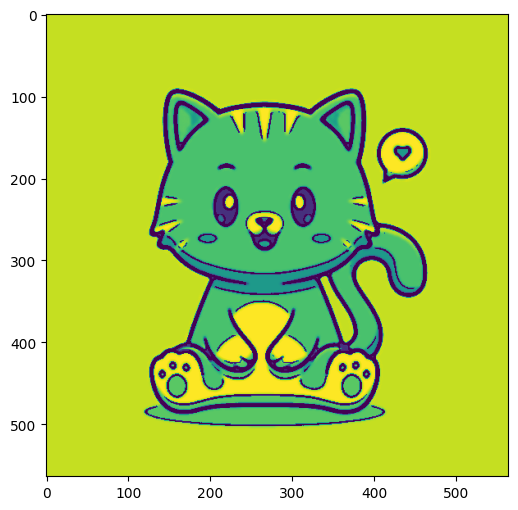

In [33]:
img = cv2.cvtColor(cartoon, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

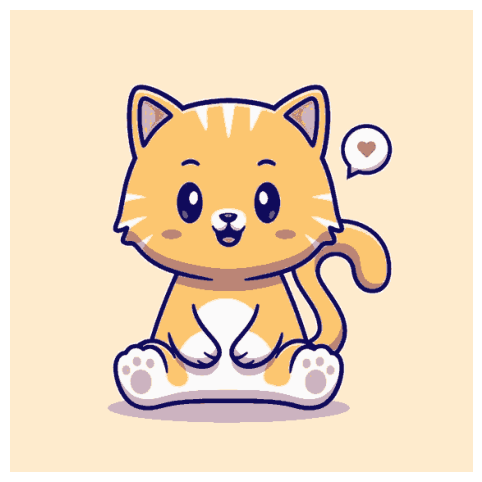

In [35]:
img_reduced = img_reduced.astype(np.uint8)

plt.axis("off")
plt.imshow(img_reduced)

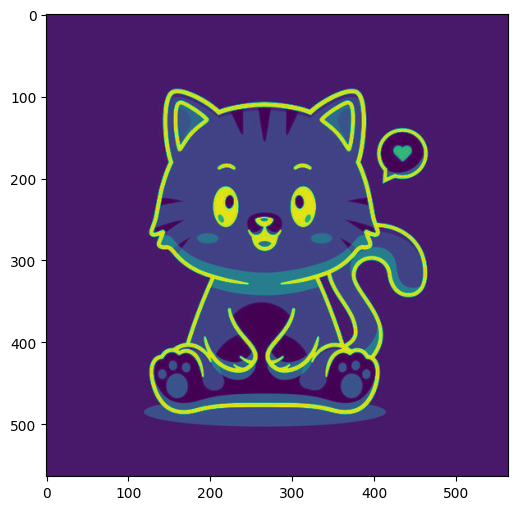

In [17]:
inverted_imag = 500 - gray_image
plt.imshow(inverted_imag)


In [19]:
# Bilateral Filter

blurred = cv2.bilateralFilter(img_reduced, d=7, sigmaColor=200,sigmaSpace=200)
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)

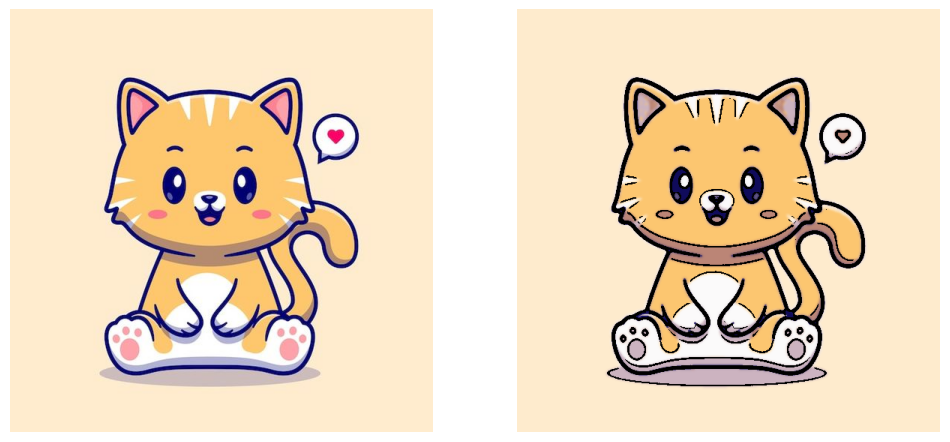

In [20]:
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(cartoon)

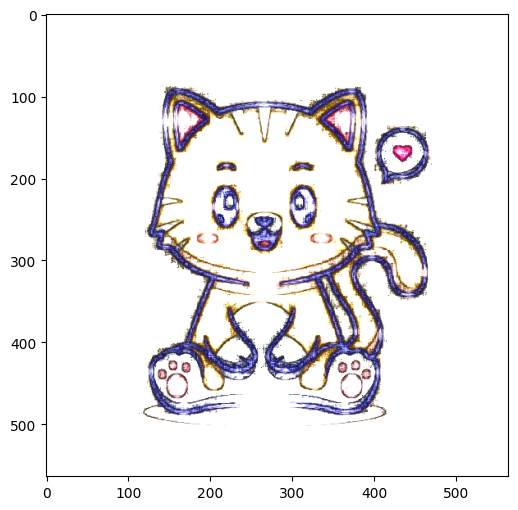

In [26]:
def pencil_sketch_col(img):
    #inbuilt function to create sketch effect in colour and greyscale
    sk_gray, sk_color = cv2.pencilSketch(img, sigma_s=60, sigma_r=0.07, shade_factor=0.1)
    return  sk_color
a6 = pencil_sketch_col(img)
plt.imshow(a6)

In [21]:
# export cartoon to a jpg file
cartoon_ = cv2.cvtColor(cartoon, cv2.COLOR_RGB2BGR)
cv2.imwrite('cartoon.png', cartoon_)

True

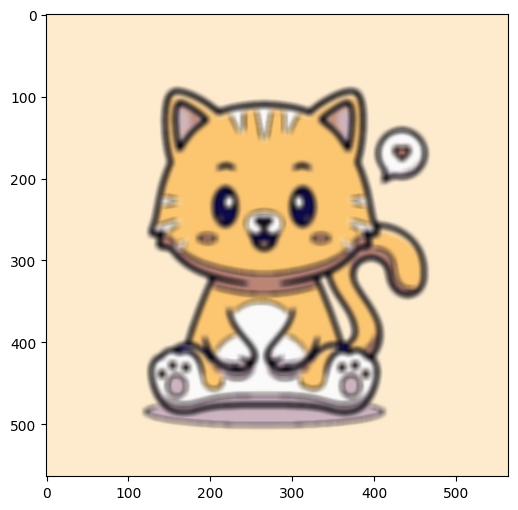

In [23]:
figure_size = 9
new_image = cv2.blur(cartoon,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.imshow(new_image)

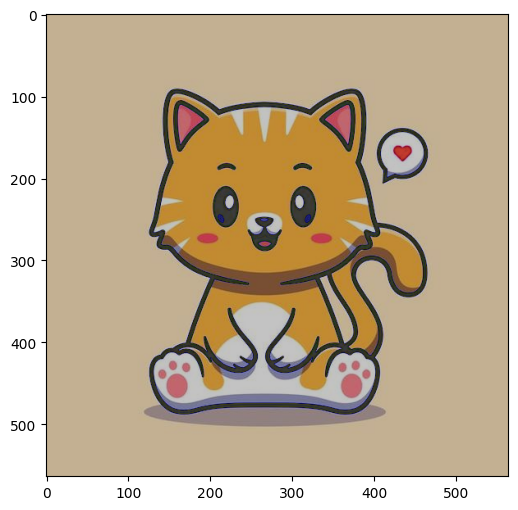

In [24]:
def bright(img, beta_value ):
    img_bright = cv2.convertScaleAbs(img, beta=beta_value)
    return img_bright
a3 = bright(img, -60)
plt.imshow( a3)

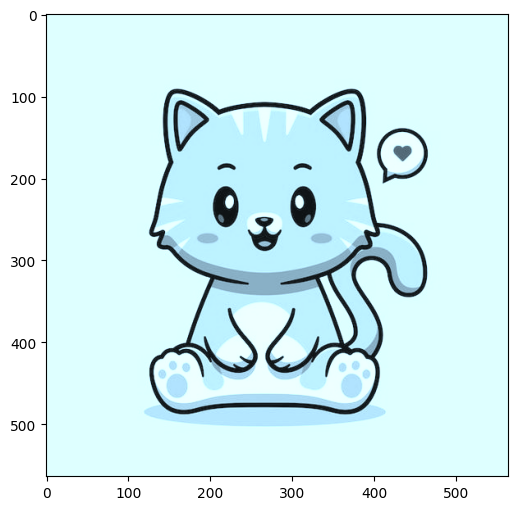

In [25]:
def sepia(img):
    img_sepia = np.array(img, dtype=np.float64) # converting to float to prevent loss
    img_sepia = cv2.transform(img_sepia, np.matrix([[0.272, 0.534, 0.131],
                                    [0.349, 0.686, 0.168],
                                    [0.393, 0.769, 0.189]])) # multipying image with special sepia matrix
    img_sepia[np.where(img_sepia > 255)] = 255 # normalizing values greater than 255 to 255
    img_sepia = np.array(img_sepia, dtype=np.uint8)
    return img_sepia
a2 = sepia(img)
plt.imshow(a2)